<a href="https://colab.research.google.com/github/vaibhavlokunde/AI-ML/blob/main/PizzaSteakSushiModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import sklearn
from torch import nn
import matplotlib.pyplot as plt

In [2]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists...skipping download")
else:
  print(f"{image_path} does not exist,downloading")
  image_path.mkdir(parents=True,exist_ok=True)

with open(data_path/"pizza_steak_sushi.zip","wb") as f:
  request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza,steak,sushi data....")
  f.write(request.content)

with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping pizza,steak,sushi data....")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist,downloading
Unzipping pizza,steak,sushi data....


In [3]:
if torch.cuda.is_available():
  device="cuda"
else:
  device="cpu"
device

'cuda'

In [4]:
train_dir=image_path/"train"
test_dir=image_path/"test"

train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [5]:
import random
from PIL import Image

image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/29417.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2924941.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/667309.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2569760.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2992084.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1105700.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2121603.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2576168.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/68684.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/715169.jpg')]

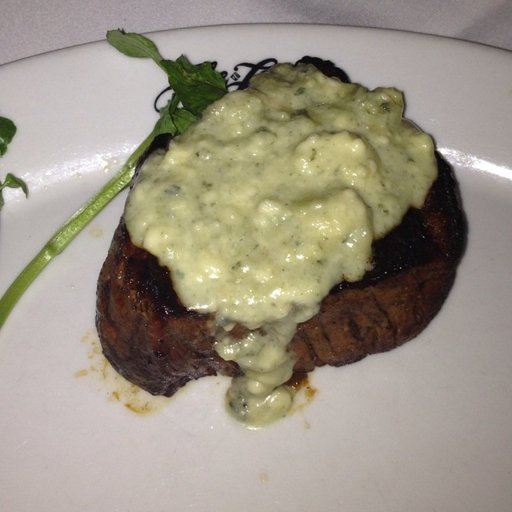

In [7]:
random_image=random.choice(image_path_list)
img=Image.open(random_image)
img

array([[[149, 139, 140],
        [148, 138, 139],
        [146, 136, 137],
        ...,
        [116, 106, 105],
        [116, 106, 105],
        [115, 105, 104]],

       [[149, 139, 140],
        [150, 140, 141],
        [151, 141, 142],
        ...,
        [118, 108, 107],
        [118, 108, 107],
        [118, 108, 107]],

       [[148, 138, 139],
        [151, 141, 142],
        [154, 144, 145],
        ...,
        [119, 109, 108],
        [120, 110, 109],
        [120, 110, 109]],

       ...,

       [[183, 172, 168],
        [181, 170, 166],
        [182, 171, 167],
        ...,
        [140, 131, 124],
        [139, 130, 123],
        [139, 130, 123]],

       [[183, 172, 168],
        [182, 171, 167],
        [182, 171, 167],
        ...,
        [139, 130, 123],
        [139, 130, 123],
        [139, 130, 123]],

       [[183, 172, 168],
        [182, 171, 167],
        [182, 171, 167],
        ...,
        [137, 128, 121],
        [137, 128, 121],
        [136, 127, 120]]], dtype=uint8)
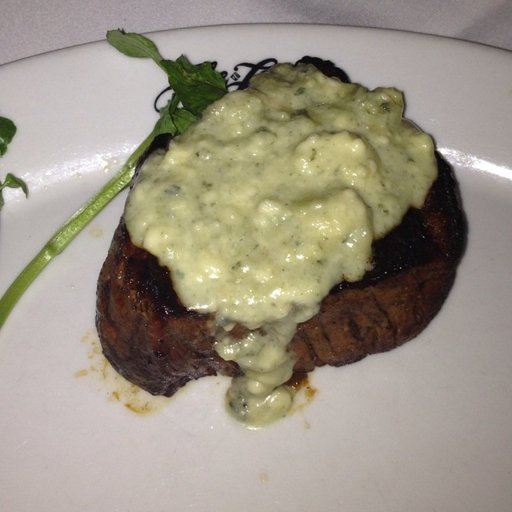

In [9]:
import numpy as np
random_image_array=np.asarray(img)
random_image_array

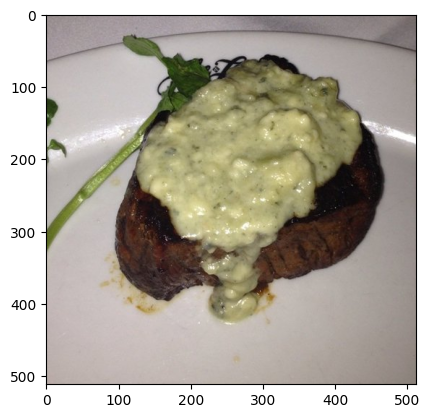

In [10]:
plt.imshow(random_image_array)

In [11]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [22]:
data_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [23]:
data_transform(img)

tensor([[[0.5961, 0.6000, 0.6000,  ..., 0.5176, 0.4902, 0.4627],
         [0.6039, 0.6078, 0.6118,  ..., 0.4863, 0.4627, 0.4510],
         [0.6118, 0.6157, 0.6275,  ..., 0.4706, 0.4627, 0.4627],
         ...,
         [0.7294, 0.7294, 0.7373,  ..., 0.5765, 0.5647, 0.5529],
         [0.7255, 0.7294, 0.7294,  ..., 0.5686, 0.5569, 0.5490],
         [0.7216, 0.7255, 0.7255,  ..., 0.5608, 0.5529, 0.5451]],

        [[0.5569, 0.5608, 0.5608,  ..., 0.4745, 0.4431, 0.4235],
         [0.5647, 0.5686, 0.5725,  ..., 0.4431, 0.4235, 0.4196],
         [0.5725, 0.5725, 0.5843,  ..., 0.4353, 0.4275, 0.4275],
         ...,
         [0.6824, 0.6863, 0.6941,  ..., 0.5333, 0.5255, 0.5176],
         [0.6745, 0.6784, 0.6863,  ..., 0.5294, 0.5216, 0.5137],
         [0.6706, 0.6745, 0.6824,  ..., 0.5255, 0.5176, 0.5098]],

        [[0.5608, 0.5647, 0.5647,  ..., 0.4706, 0.4431, 0.4196],
         [0.5686, 0.5725, 0.5765,  ..., 0.4471, 0.4196, 0.4157],
         [0.5765, 0.5843, 0.5961,  ..., 0.4392, 0.4314, 0.

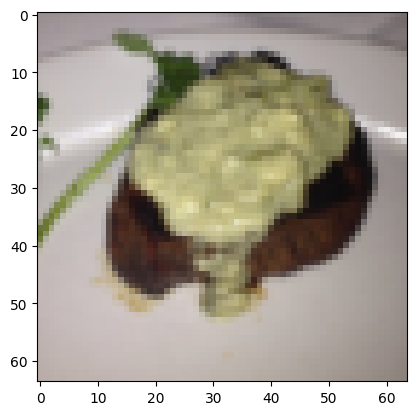

In [24]:
plt.imshow(data_transform(img).permute(1,2,0))

In [25]:
train_data=datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)
test_data=datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
)

In [26]:
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [28]:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [29]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [35]:
#Creating dataloaders
import os
NUM_WORKERS=os.cpu_count()
train_dataloader=DataLoader(train_data,
                            batch_size=32,
                            num_workers=NUM_WORKERS,
                            shuffle=True,)
test_dataloader=DataLoader(test_data,
                           batch_size=32,
                           shuffle=False,
                           num_workers=NUM_WORKERS)

In [36]:
image,label=next(iter(train_dataloader))

image,label

(tensor([[[[0.0118, 0.0157, 0.0196,  ..., 0.2000, 0.1490, 0.1176],
           [0.0157, 0.0235, 0.0275,  ..., 0.1529, 0.1216, 0.0902],
           [0.0275, 0.0314, 0.0353,  ..., 0.1216, 0.0980, 0.0745],
           ...,
           [0.4000, 0.4902, 0.5490,  ..., 0.1333, 0.1255, 0.1059],
           [0.4039, 0.4235, 0.4196,  ..., 0.1961, 0.1882, 0.1765],
           [0.3569, 0.3922, 0.4078,  ..., 0.1647, 0.1647, 0.1490]],
 
          [[0.0157, 0.0235, 0.0275,  ..., 0.1569, 0.0824, 0.0510],
           [0.0235, 0.0275, 0.0353,  ..., 0.0902, 0.0549, 0.0353],
           [0.0314, 0.0353, 0.0392,  ..., 0.0549, 0.0471, 0.0275],
           ...,
           [0.3294, 0.4314, 0.5059,  ..., 0.1137, 0.1059, 0.0824],
           [0.3059, 0.3333, 0.3333,  ..., 0.1569, 0.1451, 0.1412],
           [0.2667, 0.2980, 0.3137,  ..., 0.1216, 0.1216, 0.1176]],
 
          [[0.0157, 0.0157, 0.0157,  ..., 0.0941, 0.0275, 0.0196],
           [0.0314, 0.0275, 0.0314,  ..., 0.0392, 0.0078, 0.0078],
           [0.0392, 0.04

In [37]:
len(train_data),len(test_data)

(225, 75)

In [38]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int) -> None:
               super().__init__()
               self.conv_block_1=nn.Sequential(
                   nn.Conv2d(in_channels=input_shape,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=2,
                                stride=2)
               )
               self.conv_block_2=nn.Sequential(
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=0),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=2,
                                stride=2)
               )
               self.classifier=nn.Sequential(
                   nn.Flatten(),
                   nn.Linear(in_features=hidden_units*13*13, #10*16*16
                             out_features=output_shape)
               )
  def forward(self,x):
    x=self.conv_block_1(x)
    print(x.shape)
    x=self.conv_block_2(x)
    print(x.shape)
    x=self.classifier(x)
    print(x.shape)
    return x
    #return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [39]:
torch.manual_seed(42)
model_0=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [40]:
image_batch,label_batch=next(iter(train_dataloader))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [41]:
model_0(image_batch.to(device))

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])


tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [42]:

#we can print the summary of the model
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0,input_size=[1,3,64,64])

torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [43]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=correct/len(y_pred)
  return acc

In [44]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  model.train()

  train_loss,train_acc=0,0

  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)

    y_pred=model(X)
    y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc+=accuracy_fn(y,y_pred_class)

    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss=train_loss/len(dataloader)
  train_acc=train_acc/len(dataloader)
  return train_loss,train_acc


In [45]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device):
  model.eval()

  test_loss,test_acc=0,0

  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataloader):
      X,y=X.to(device),y.to(device)

      test_pred_logits=model(X)

      loss=loss_fn(test_pred_logits,y)
      test_loss+=loss.item()

      test_pred_labels=test_pred_logits.argmax(dim=1)
      test_acc+=((test_pred_labels==y).sum().item()/len(test_pred_labels))

  test_loss=test_loss/len(dataloader)
  test_acc=test_acc/len(dataloader)
  return test_loss,test_acc

In [46]:
from tqdm.auto import tqdm

def train(model:torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
          epochs:int=5,
          device=device):
  results={"train_loss":[],
           "train_acc":[],
           "test_loss":[],
           "test_acc":[]}
  for epoch in tqdm(range(epochs)):
    train_loss,train_acc=train_step(model=model,
                                    dataloader=train_dataloader,
                                    loss_fn=loss_fn,
                                    optimizer=optimizer,
                                    device=device)
    test_loss,test_acc=test_step(model=model,
                                 dataloader=test_dataloader,
                                 loss_fn=loss_fn,
                                 device=device)
    print(f"Epoch: {epoch} | train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS=5

model_0=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(train_data.classes)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model_0.parameters(),
                           lr=0.0001)

from timeit import default_timer as timer
start_time=timer()

model_0_results=train(model=model_0,
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)
end_time=timer()
print(f"Total training time:{end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([11, 10, 30, 30])
torch.Size([11, 10, 13, 13])
torch.Size([11, 3])
Epoch: 0 | train_loss: 1.0990 | train_acc: 0.3047 | test_loss: 1.0979 | test_acc: 0.2604
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13]

In [53]:
from typing import Dict, List
def plot_loss_curves(results:Dict[str,List[float]]):
  loss=results["train_loss"]
  test_loss=results["test_loss"]

  accuracy=results["train_acc"]
  test_accuracy=results["test_acc"]

  epochs=range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))
  plt.plot(epochs,loss,label="train_loss")
  plt.plot(epochs,test_loss,label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label="train_accuracy")
  plt.plot(epochs,test_accuracy,label="test_accuracy")
  plt.title("accuracy")
  plt.xlabel("Epochs")
  plt.legend()

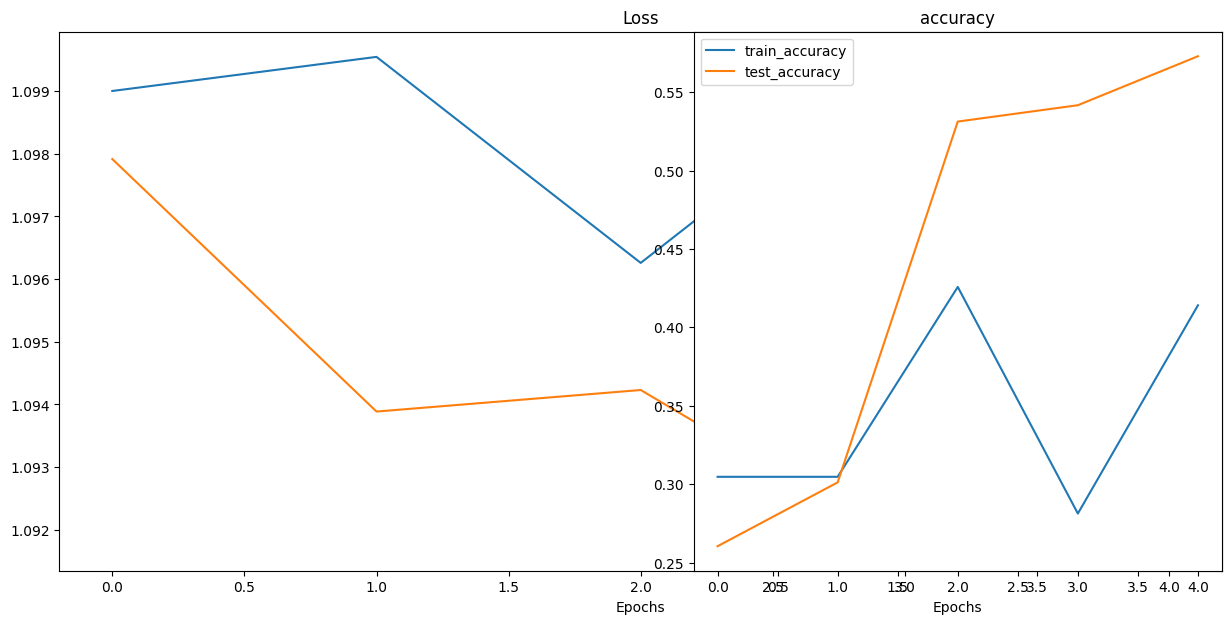

In [54]:
plot_loss_curves(model_0_results)

In [55]:
from torchvision import transforms
train_transform_trivial=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_simple=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [56]:
from torchvision import datasets
train_data_augmented=datasets.ImageFolder(root=train_dir,
                                          transform=train_transform_trivial)
test_data_simple=datasets.ImageFolder(root=test_dir,
                                      transform=test_transform_simple)

In [57]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [58]:
#turn datasets into Dataloaders
from torch.utils.data import DataLoader
import os
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented=DataLoader(dataset=train_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       num_workers=NUM_WORKERS,
                                       shuffle=True)
test_dataloader_simple=DataLoader(dataset=test_data_simple,
                                  batch_size=BATCH_SIZE,
                                  num_workers=NUM_WORKERS,
                                  shuffle=False)

In [59]:
#Create model_1 and sent it to the target device
torch.manual_seed(42)
model_1=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [60]:
 torch.manual_seed(42)
 torch.cuda.manual_seed(42)

 NUM_EPOCHS=5

 loss=nn.CrossEntropyLoss()
 optimizer=torch.optim.Adam(model_1.parameters(),lr=0.001)

 from timeit import default_timer as timer
 start_time=timer()

 model_1_results=train(model=model_1,
                       train_dataloader=train_dataloader_augmented,
                       test_dataloader=test_dataloader_simple,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS,
                       device=device)
 end_time=timer()
 print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([11, 10, 30, 30])
torch.Size([11, 10, 13, 13])
torch.Size([11, 3])
Epoch: 0 | train_loss: 1.1049 | train_acc: 0.2500 | test_loss: 1.1019 | test_acc: 0.2604
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13]

In [61]:
model_1_results

{'train_loss': [1.1049137264490128,
  1.080678567290306,
  1.0712225809693336,
  1.1254106163978577,
  1.0858425050973892],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.42578125],
 'test_loss': [1.1019273201624553,
  1.1260881225268047,
  1.1592486302057903,
  1.158112903436025,
  1.155155062675476],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.3333333333333333]}

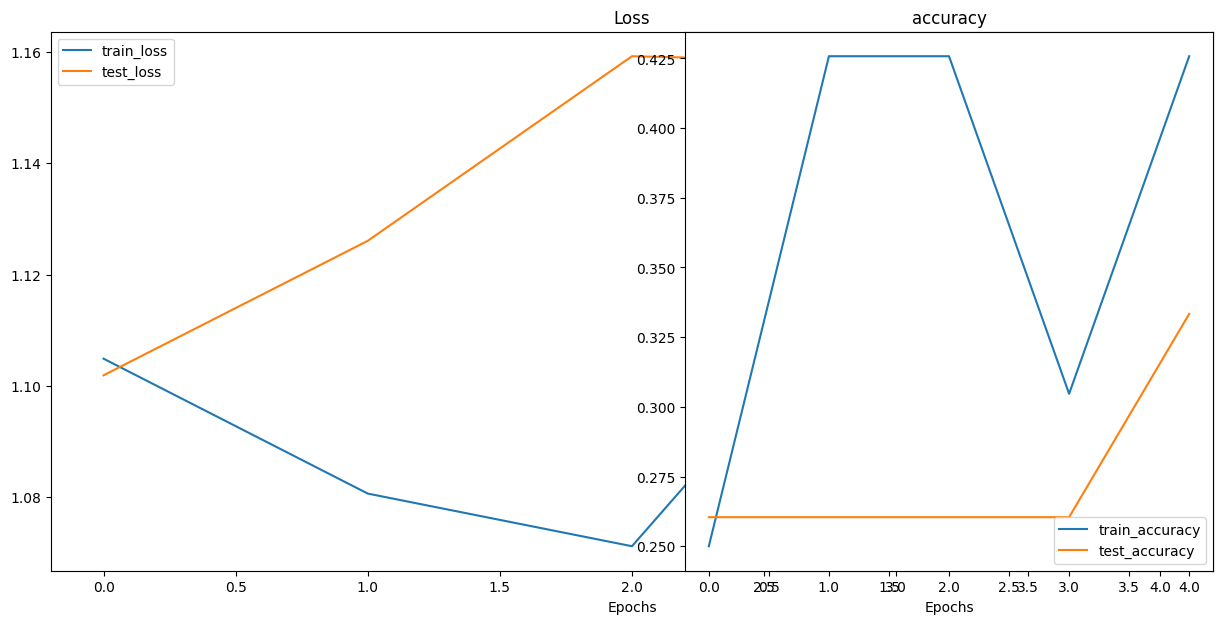

In [62]:
plot_loss_curves(model_1_results)

In [63]:
import pandas as pd
model_0_df=pd.DataFrame(model_0_results)
model_1_df=pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.099002,0.304688,1.097915,0.260417
1,1.099547,0.304688,1.093886,0.301136
2,1.096258,0.425781,1.094230,0.531250
3,1.099557,0.281250,1.091737,0.541667
4,1.095381,0.414062,1.093162,0.572917


In [64]:
import requests

custom_image_path = data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
  with open(custom_image_path,"wb") as f:

    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists")

In [65]:
import torchvision

custom_image_uint8=torchvision.io.read_image(str(custom_image_path))
custom_image_uint8

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

(-0.5, 3023.5, 4031.5, -0.5)

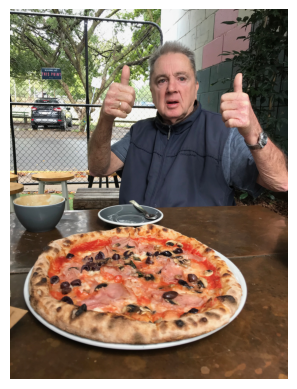

In [66]:
plt.imshow(custom_image_uint8.permute(1,2,0))
plt.axis(False)

In [67]:
custom_image=torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [68]:
#Create transform pipeline to resize image ad this image is too big...u can see in the error

from torchvision import transforms
custom_image_transform=transforms.Compose([
    transforms.Resize(size=(64,64))
])
custom_image_transformed=custom_image_transform(custom_image)

print(f"Original shape:{custom_image.shape}")
print(f"Transformed shape:{custom_image_transformed.shape}")

Original shape:torch.Size([3, 4032, 3024])
Transformed shape:torch.Size([3, 64, 64])


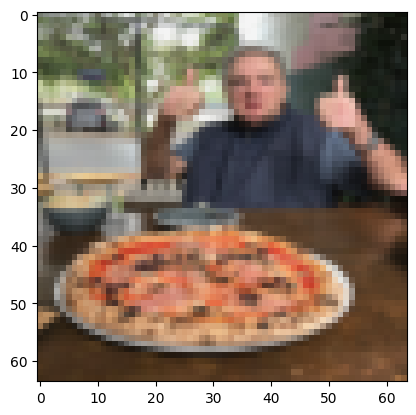

In [69]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [70]:
custom_image_transformed.shape,custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [71]:
#This should work because we added a batch size
model_1.eval()
with torch.inference_mode():
  custom_image_pred=model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])


tensor([[ 0.0793,  0.0366, -0.2082]], device='cuda:0')

In [72]:
custom_image_pred_probs=torch.softmax(custom_image_pred,dim=1)
custom_image_pred_probs

tensor([[0.3692, 0.3538, 0.2770]], device='cuda:0')

In [73]:
custom_image_pred_labels=torch.argmax(custom_image_pred_probs,dim=1)
custom_image_pred_labels

tensor([0], device='cuda:0')

In [74]:
class_names[custom_image_pred_labels]

'pizza'

In [75]:
def pred_and_plot_image(model:torch.nn.Module,
                        image_path:str,
                        class_names:List[str]=None,
                        transform=None,
                        device=device):
  target_image=torchvision.io.read_image(str(image_path)).type(torch.float32)

  target_image=target_image/255.

  #tranform if necessary
  if transform:
    target_image=transform(target_image)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    #add an extra dimension to the image(this is the batch dimension, eg our model will predict)
    target_image=target_image.unsqueeze(dim=0)

    #Make a prediction on the image with an extra dimension
    target_image_pred=model(target_image.to(device))

    #convert logits->prediction prob
    target_image_pred_probs=torch.softmax(target_image_pred,dim=1)

    #convert prediction prob->labels
    target_image_pred_labels=torch.argmax(target_image_pred_probs,dim=1)

    #plot the image alongside the prediction and prediction prob
    plt.imshow(target_image.squeeze().permute(1,2,0))
    if class_names:
      title=f"Pred:{class_names[target_image_pred_labels.cpu()]} | Prob:{target_image_pred_probs.max().cpu():.3f}"
    else:
      title=f"Pred:{target_image_pred_labels} | Prob:{target_image_pred_probs.max().cpu():.3f}"

    plt.title(title)
    plt.axis(False)


torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])


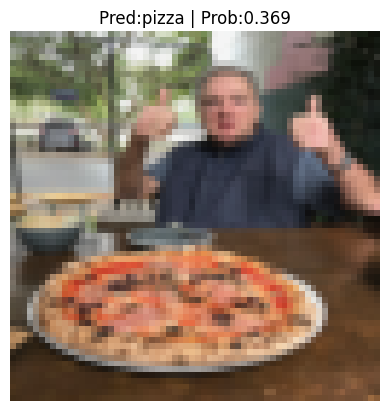

In [76]:
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)